# Primerjalne analize (angl. benchmarking) in skriptno testiranje

Kaj so primerjalne analize?

Kaj je eksperimetalni načrt, nekatere vrste poskusov

Koncept skriptenga testiranja za benchmarking


### Problem: sledenje eksperimetov pri razvoju algoritmov z več parametri


<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## Kaj so primerjalne analize (angl. benchmarking)

Komponente primerjalne analize 
* Javna podatkovna baza: lena
<img style="float: right;" src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/220px-Lenna.png">

* Mere uspešnosti: RMSE, percepcijki testi za dano zgoščevalno razmerje



<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## Statistične testne sheme

### Problem: pošteno testiranje 
* učni in testni podatki ločeni
* izločane vpliva naključja (sreče) pri testiranjih

### Rešitve
* 10 kratno križno preverjanje
* randomized schemes
* leave one out


<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## Načrtovanje eksperimetov

Kaj je to

Slika

Vrste eksperimentov


<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## Vrste eksperimentov

ANOVA 

Latin Square

Factorial design


<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## Koncept skriptega testiranja

### Problem sledenja velikega števila eksperimentov

* Ko doktorski študent odide
* Zagon eksperimentov izpred dveh let?
* Sledenje več 100 ali več 1000 testiranj?

### Kaje ne deluje

* Pisanje ročnih poročil
* Pisanje elektronskih poročil
* Dokumentacijskih sistemov take vrste ni

### Kaj deluje: skriptno testiranje
* "Do not drag the data arround"
* Organizacija map in podatkov
* Struktura testne skripte 


<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## Organizacija direktorijev in podatkov

01-Experiments

02- 


<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

## Struktura skripte s preprostim primerom

1. Kratek opis: 
 * Kaj
 * Kdaj, kdo, ...

2. Konfiguracija
    * podatkov
    * parametrizacije poskusa

3. Kreiranje sledilnih datotek

4. Pravnan razvojni primer
    * primer ene variante

5. Sprehod čez parametrizacijo in testno shemo
    * po vseh parametrih, lahko z Simple genetic algorithm
    * sprehod po testni shemi
    * generiranje in shranjevanje rezultatov (tabele, slike, ...)

6. Zakjljučevanje shranjevanja rezultatov in poročanja




<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

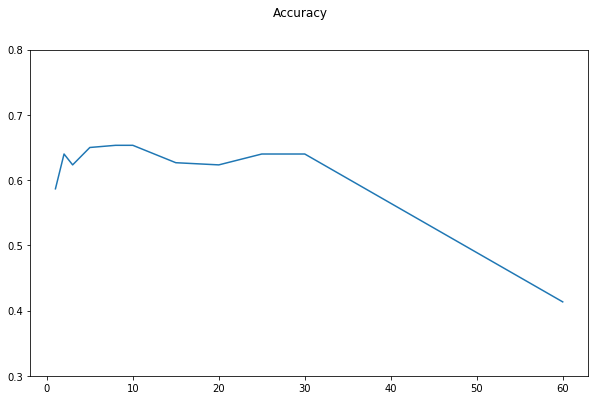

In [72]:
%matplotlib inline

def get_dists(x, k, train_set):
    ts_len = train_set.shape[0]
    dist_arr = np.zeros(ts_len)
    for ii in range(ts_len):
        dist_arr[ii] = np.linalg.norm(train_set.iloc[ii, :] - x)
       
    ord_dist_arr = np.sort(dist_arr)
    return ord_dist_arr[0:k]
    
    
#def write_to_file(filename, string):
#    with open(filename, "a") as out:
#        out.write("{}\n".format(string))
def trace_to_file(trace_f, string):
    if trace_Q:
        trace_f.write("{}".format(string))
    else:
        print "{}".format(string)
        
def trace_to_file_EOL(trace_f, string):
    if trace_Q:
        trace_f.write("{}".format(string) + "\n")
    else:
        print "{}".format(string) + "\n"

        
        
# ===========================================================================================================        
## 1. Short description -------------------------------------------------------------------------------------
# @brief An optimization of kNN classification regarding a parametr k
# @author AndrejK
# @time 2018-03-16


# ===========================================================================================================
## 2. Configuration, libraries ------------------------------------------------------------------------------
# Data
abs_path = '/home/nbuser/library/'
data_path1 = '../../02-Data/08-Iris/'
data_path2 = '/home/nbuser/library/'
data_FN = 'iris.data'

# Functions
funct_path = '/home/nbuser/library/00xBed/03-Tools/'

# Trace files 
rel_path = '00xBed/01-Experiments/'
core_trace_FN = '_OptimalKNN_trace.txt'
trace_Q = True

# Load libraries -------------------------------------------------------------------------------------------
import os, platform, sys
import numpy as np
import pandas as pd
import datetime as dt
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs




# ===========================================================================================================
# 3. Experimental design ---------------------------------------------------------------------------------------
k_lst = [1, 2, 3, 4, 5, 8, 10, 15, 20, 25, 30, 60] # factor
# k_lst = range(1, 20)
folds_num = 10
train_test_p = 0.3
weights_in = 'uniform' # 'distance' 



# ============================================================================================================
# 4. Load data & trace files ---------------------------------------------------------------------------------
    
# Load data & rearange it
#data = datasets.load_boston() # Load and return the boston house-prices dataset (regression).
#data = datasets.load_iris() #Load and return the iris dataset (classification).
#data = datasets.load_diabetes() # Load and return the diabetes dataset (regression).
#data = datasets.load_digits() # Load and return the digits dataset (classification).
#data = datasets.load_linnerud() # Load and return the linnerud dataset (multivariate regression).
#data = datasets.load_breast_cancer() # Load and return the breast cancer wisconsin dataset (classification).
#data = datasets.load_boston() 
#data.target = data.target * 10

# Randomly generte data
num_of_s, num_of_feats, num_of_cls = 100, 5, 3
cluster_stdIn = 1.2
center_boxIn = (-2.0, 2.0) 
X, y = make_blobs(n_samples=num_of_s, centers=num_of_cls, n_features=num_of_feats, random_state=0, cluster_std=cluster_stdIn, center_box=center_boxIn)

# Creare trace file
time_curr = dt.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
trace_FN = abs_path + rel_path + time_curr + core_trace_FN
if trace_Q:
    trace_file = open(trace_FN, 'w') 


        
## Settings -------------------------------------------------------------------------------------------------
# Flatten experiment - do develop single run case
k = 3

# Permutation
#np.random.randint(3, 10)
# all_perm = np.random.permutation(range(data_len))
# cut_ind = int(np.floor(train_test_p*data_len))
# train_perm = all_perm[cut_ind:]
# test_perm = all_perm[0:cut_ind]


# train_fold = iris_data.loc[train_perm]
# test_fold = iris_data.loc[test_perm]

# f_curr = iris_data.loc[12, ['f1', 'f2', 'f3', 'f4']]
# C_curr = iris_data.loc[12, ['C']]
# #print C_curr


# =============================================================================================================
# 5. Report ---------------------------------------------------------------------------------------------------
# Basics
trace_to_file_EOL(trace_file, 'An optimization of kNN classification regarding a parametr k')
trace_to_file_EOL(trace_file, 'Time: ' + time_curr)
trace_to_file_EOL(trace_file, 'OS: ' + platform.system())
trace_to_file_EOL(trace_file, 'Python ver: ' + platform.python_version())

# Experimental design
trace_to_file_EOL(trace_file, '')
trace_to_file_EOL(trace_file, 'NumOfFolds: ' + str(folds_num))
trace_to_file_EOL(trace_file, 'Test to train ratio: ' + str(train_test_p))
#trace_to_file(trace_file, )


# ============================================================================================================
# 6. Implement Experiment --------------------------------------------------------------------------------------------
trace_to_file_EOL(trace_file, '@@BeginTab')
trace_to_file_EOL(trace_file, 'Fold' + ' & ' + '{}'.format(k_lst))


acc_lst = []
 
for k in k_lst:
    fold_acc_lst = []
    for ii in range(folds_num): # 10-fold cross validation
             
        # Determine folds    
#         X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=train_test_p, random_state=np.random.randint(100))
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=train_test_p, random_state=np.random.randint(100))       
        # Train classifier
        clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weights_in)
        clf.fit(X_train, y_train)
       
        # Classify
        pred_C = clf.predict(X_test)
        true_C = y_test
 
        # Generate conf mat
        conf_mat = confusion_matrix(true_C, pred_C)
        
        # Compute & store accuracy
        acc_score = accuracy_score(true_C, pred_C)
        fold_acc_lst.append(acc_score)
       
    
        # Report it
        trace_to_file(trace_file, str(ii) + ' & ' + '{0:.3f}'.format(acc_score)) 
        
    trace_to_file_EOL(trace_file, '')
        
    acc_lst.append(pd.Series(fold_acc_lst).mean())
             
acc_aver = pd.Series(acc_lst).mean()


# Close table 
trace_to_file_EOL(trace_file, '@@EndTab')
trace_to_file_EOL(trace_file, 'Average accuracy: ' + '{0:.3f}'.format(acc_score))  


# Plot figures
fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle(u'Accuracy')
ax.plot(k_lst, acc_lst)
ax.set_ylim([0.3, 0.8])
plt.show()
#plt.savefig(abs_path + rel_path + 'Accuracy.pdf')
     


## Close trace files -------------------------------------------------------------------------------------------------
if trace_Q:
    trace_file.close()




#<img src="https://raw.githubusercontent.com/andrejkk/ORvTK_SlidesImgs/master/footer_full.jpg">

In [59]:
acc_lst

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6699999999999999]

In [56]:
type(y)

numpy.ndarray

In [ ]:
X, y = make_blobs(n_samples=20, centers=3, n_features=3, random_state=0)
num_of_feats = 3

data = pd.DataFrame(X, columns=range(num_of_feats))
target = pd.DataFrame(y)
data = pd.concat([data, target], axis=1)

#data.data = X
#data.target = y
# data.target

In [46]:
data

,0,1,2,target
0,-0.180614,-0.131432,4.705366,1
1,1.146194,-1.558149,2.778408,1
2,2.432693,-0.960464,3.067147,1
3,0.409572,4.061638,3.569659,0
4,2.242389,3.797911,4.600468,0
5,-1.555621,7.468936,10.392967,2
6,0.643213,4.351152,3.518008,0
7,0.707008,-1.078266,1.925452,1
8,-1.727676,8.146824,8.497235,2
9,-1.706178,8.260853,9.245284,2
